In [1]:
import osmnx as ox
from shapely.geometry import box, Polygon

/home/tasin/anaconda3/envs/Fleet-Simulation/lib/python3.10/site-packages/requests/__init__.py:86: RequestsDependencyWarning: Unable to find acceptable character detection dependency (chardet or charset_normalizer).
  warnings.warn(


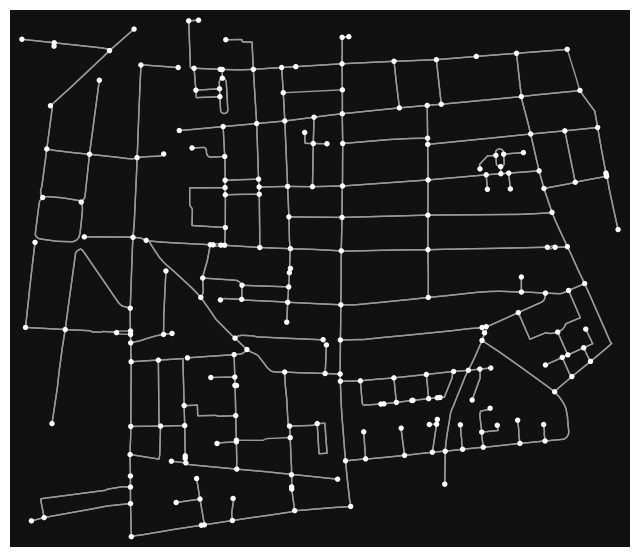

In [2]:
place_name = "Hackney, UK"
area_df = ox.geocode_to_gdf(place_name)
clip_polygon = box(-0.08, 51.545, -0.06, 51.535)
area_df = area_df.clip(clip_polygon) # temp
area = area_df.geometry.iloc[0]
graph = ox.graph_from_polygon(area, network_type="drive")
graph = ox.project_graph(graph)
nodes, edges = ox.graph_to_gdfs(graph, nodes=True, edges=True)
fig, ax = ox.plot_graph(graph)

In [3]:
road_tags = {"highway": True}
roads = ox.features_from_polygon(area, road_tags)

In [4]:
building_tags = {"building": True}
buildings = ox.features_from_polygon(area, building_tags)
buildings = buildings[buildings.geometry.apply(lambda geom: isinstance(geom, (Polygon)))]

In [12]:
buildings.geom_type

element   id        
relation  6922968       Polygon
          7790335       Polygon
          17193995      Polygon
way       6277988       Polygon
          27769405      Polygon
                         ...   
          1374821493    Polygon
          1374821494    Polygon
          1391887123    Polygon
          1417332695    Polygon
          1417332696    Polygon
Length: 1791, dtype: object

In [24]:
import pandas as pd
for _, building in buildings.iterrows():
    if isinstance(building, pd.Series):
        xx = building['geometry'].coords.xy

NotImplementedError: Component rings have coordinate sequences, but the polygon does not

In [23]:
type(building)

pandas.core.series.Series

In [7]:
print(nodes.head(1))

                   y              x  street_count highway  \
osmid                                                       
107003  5.713924e+06  703691.445594             3     NaN   

                              geometry  
osmid                                   
107003  POINT (703691.446 5713923.642)  


In [8]:
print(edges.head(1))

                          osmid   highway maxspeed            name  oneway  \
u      v         key                                                         
107003 654181373 0    206555990  tertiary   20 mph  Shrubland Road   False   

                     reversed     length  \
u      v         key                       
107003 654181373 0       True  37.182418   

                                                               geometry lanes  \
u      v         key                                                            
107003 654181373 0    LINESTRING (703691.446 5713923.642, 703688.002...   NaN   

                      ref bridge width tunnel  
u      v         key                           
107003 654181373 0    NaN    NaN   NaN    NaN  


In [9]:
minx, miny, maxx, maxy = nodes.total_bounds
SCREEN_WIDTH, SCREEN_HEIGHT = 900, 900
scale_x = SCREEN_WIDTH / (maxx - minx)
scale_y = SCREEN_HEIGHT / (maxy - miny)

def normalize_coords(x, y):
    norm_x = int((x - minx) * scale_x)
    norm_y = int(SCREEN_HEIGHT - (y - miny) * scale_y)  # flip Y
    return (norm_x, norm_y)

In [10]:
node_positions = {
    node: normalize_coords(data['x'], data['y'])
    for node, data in graph.nodes(data=True)
}

# Edge polylines
edges_list = []
for u, v, data in graph.edges(data=True):
    if 'geometry' in data:
        x, y = data['geometry'].xy
    else:  # straight line edge
        x = [graph.nodes[u]['x'], graph.nodes[v]['x']]
        y = [graph.nodes[u]['y'], graph.nodes[v]['y']]

    edge_points = [normalize_coords(xi, yi) for xi, yi in zip(x, y)]
    edges_list.append(edge_points)

In [11]:
node_positions

{107003: (849, 458),
 654181373: (825, 470),
 654181358: (858, 594),
 107016: (823, 394),
 107009: (613, 483),
 707057356: (754, 473),
 18061272: (612, 399),
 107010: (481, 495),
 34215949: (401, 491),
 6379875313: (480, 557),
 238700: (482, 401),
 33779449: (800, 334),
 4470920465: (805, 395),
 107021: (321, 554),
 108575: (339, 573),
 985081193: (454, 556),
 46920933: (270, 483),
 108566: (164, 707),
 34214696: (209, 707),
 1834824743: (163, 756),
 34214677: (164, 595),
 108569: (163, 794),
 279104458: (163, 813),
 108572: (324, 782),
 34214694: (247, 771),
 108573: (406, 792),
 900714138: (323, 734),
 46922067: (407, 813),
 4913816757: (404, 727),
 12244358262: (476, 799),
 5220841025: (396, 613),
 34214693: (320, 582),
 108586: (164, 547),
 13085084768: (163, 541),
 52735531: (164, 562),
 6996898620: (142, 544),
 198270: (163, 842),
 279104456: (33, 866),
 198272: (165, 900),
 198273: (270, 880),
 5213502827: (275, 879),
 198274: (317, 871),
 4352646741: (318, 833),
 198276: (411, 

In [12]:
edges_list

[[(849, 458), (847, 460), (846, 460), (840, 463), (825, 470)],
 [(849, 458),
  (858, 483),
  (860, 486),
  (873, 522),
  (886, 555),
  (887, 559),
  (889, 561),
  (890, 563),
  (885, 568),
  (883, 570),
  (861, 592),
  (858, 594)],
 [(849, 458), (839, 435), (828, 405), (825, 400), (823, 394)],
 [(825, 470), (840, 463), (846, 460), (847, 460), (849, 458)],
 [(825, 470), (817, 474), (814, 476), (810, 476), (790, 475)],
 [(825, 470),
  (826, 473),
  (828, 480),
  (843, 518),
  (821, 528),
  (819, 533),
  (816, 538),
  (808, 543)],
 [(858, 594), (856, 592), (856, 591), (849, 573), (848, 570)],
 [(858, 594),
  (861, 592),
  (883, 570),
  (885, 568),
  (890, 563),
  (889, 561),
  (887, 559),
  (886, 555),
  (873, 522),
  (860, 486),
  (858, 483),
  (849, 458)],
 [(858, 594), (848, 603), (845, 606), (830, 621)],
 [(823, 394), (825, 400), (828, 405), (839, 435), (849, 458)],
 [(823, 394), (814, 371), (811, 365), (806, 352), (800, 334)],
 [(823, 394), (820, 395), (816, 395), (805, 395)],
 [(613